In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


from astropy.stats import RipleysKEstimator
import seaborn as sns

In [2]:
N = []
pos = []
age = []
count = 0
with open("ratFall.txt", "r") as f:
    for line in f:
        if line.startswith("#N: "):
            N.append(int(line.split(": ")[1]))
        elif line.startswith("#Position: "):
            cols = line.split()[1:]
            pos.append([float(i) for i in cols])
        elif line.startswith("#Age: "):
            cols = line.split()[1:]
            age.append([int(i) for i in cols])

Text(0, 0.5, 'N')

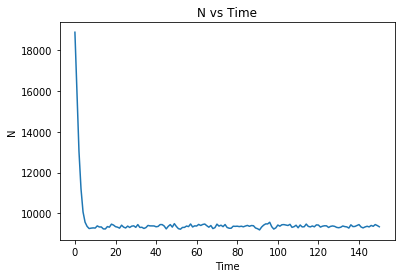

In [3]:
plt.plot(N)
plt.title("N vs Time")
plt.xlabel("Time")
plt.ylabel("N")

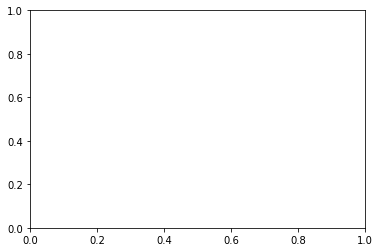

In [4]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((0, 1))

scat = ax.scatter([], [])

def init():
    scat.set_offsets(np.c_[[], []])
    return (scat)

def animate(i):
    x = pos[i][::2]
    y = pos[i][1::2]
    scat.set_offsets(np.c_[x, y])
    return (scat)

def plotSpace(i):
    x = pos[i][::2]
    y = pos[i][1::2]
    plt.scatter(x, y)
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.title("Agent Spatial Distribution\n t=" + str(i))

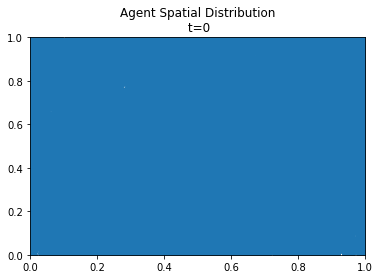

In [5]:
plotSpace(0)

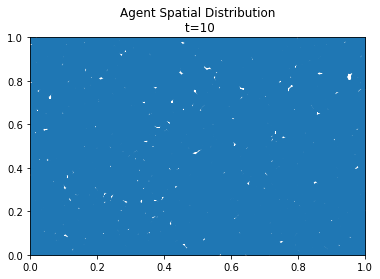

In [6]:
plotSpace(10)

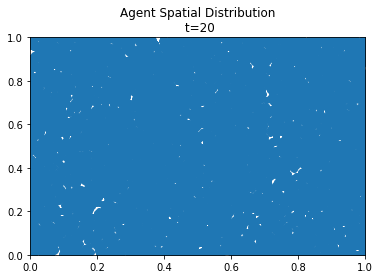

In [7]:
plotSpace(20)

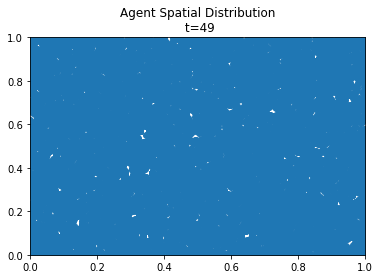

In [8]:
plotSpace(49)

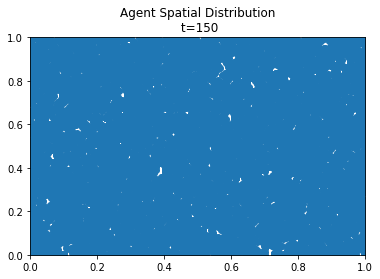

In [9]:
plotSpace(150)

# L Function

In [10]:
def plotL(j):
    Kest = RipleysKEstimator(area=1, x_max=1, y_max=1, x_min=0, y_min=0)
    r = np.linspace(0, 1, 100)
    x = pos[j][::2]
    y = pos[j][1::2]
    z = np.array([[x[0],y[0]]])
    
    d = ((10**0.5)*1000)
    x2 = [i*d for i in r]
    
    for i in range(1, len(x)):
       z = np.append(z, [[x[i], y[i]]], axis=0)
    plt.plot(x2, -r+(Kest.poisson(r)/np.pi)**0.5, color='black', ls=':', label=r'$L_{expected}$')
    plt.plot(x2, -r+(Kest(data=z, radii=r, mode='translation')/np.pi)**0.5, color='green',
             label=r'$L_{observed}$')
    plt.axvline(x=25, label=r'Home Range')
    plt.title("Ripley's L vs radius\n  t="+str(j))
    plt.xlabel("radius (m)")
    plt.ylabel("Ripley's L")
    plt.legend()

In [33]:
#plot2L(0)

In [34]:
#plot2L(49)

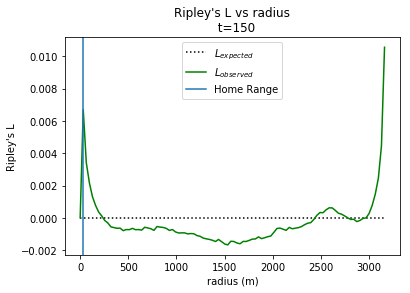

In [12]:
plotL(150)

In [13]:
def agePlot(i):
    """sns.distplot(age[i], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label="test")"""
    weights = np.ones_like(age[i])/float(len(age[i]))
    plt.hist(age[i], weights=weights)
    plt.title("Density Plot of Age\n  t="+str(i))
    plt.xlabel("Age")
    plt.ylabel("Density")

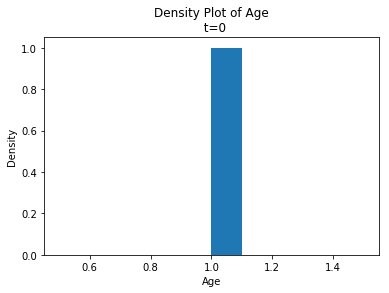

In [14]:
agePlot(0)

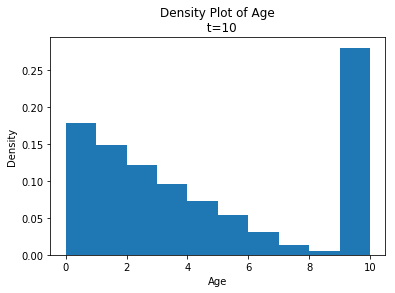

In [15]:
agePlot(10)

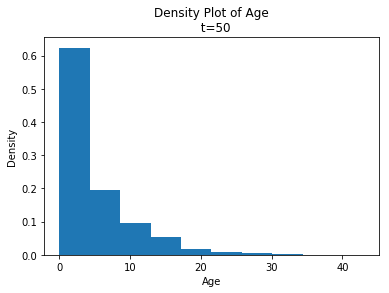

In [16]:
agePlot(50)

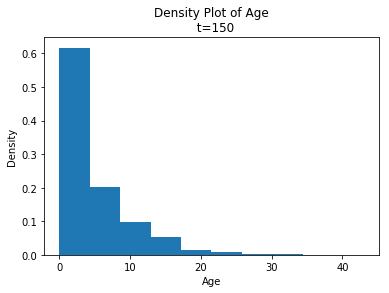

In [17]:
agePlot(150)